In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import statsmodels.api as sm


api_key = "M0H1JZNA6VMOG30H"
url = "https://www.alphavantage.co/query?"

In [3]:
# The URLs for the different sector-wise stock indices are defined below:
url_xlf = (f"{url}function=TIME_SERIES_DAILY&symbol=XLF&outputsize=full&extended_hours=false&apikey={api_key}&datatype=csv")
url_xlv = (f"{url}function=TIME_SERIES_DAILY&symbol=XLV&outputsize=full&extended_hours=false&apikey={api_key}&datatype=csv")
url_xlk = (f"{url}function=TIME_SERIES_DAILY&symbol=XLK&outputsize=full&extended_hours=false&apikey={api_key}&datatype=csv")
url_xle = (f"{url}function=TIME_SERIES_DAILY&symbol=XLE&outputsize=full&extended_hours=false&apikey={api_key}&datatype=csv")

# The read_csv function is used to read the data via the APIs above, and varaibles relative to the sectors are defined below.
df_financial = pd.read_csv(url_xlf)
df_healthcare = pd.read_csv(url_xlv)
df_technology = pd.read_csv(url_xlk)
df_energy = pd.read_csv(url_xle)


In [4]:
# Data is cleaned as per the time period of the analysis: 2017 - 2023
# Step 3: Define the start and end dates for filtering
df_financial['timestamp'] = pd.to_datetime(df_financial['timestamp'])
df_healthcare['timestamp'] = pd.to_datetime(df_healthcare['timestamp'])
df_technology['timestamp'] = pd.to_datetime(df_technology['timestamp'])
df_energy['timestamp'] = pd.to_datetime(df_energy['timestamp'])

start_date = '2017-01-01'
end_date = '2023-12-31'

# The dataFrame is filtered for the above specified date range
clean_df_financial = df_financial[(df_financial['timestamp'] >= start_date) & (df_financial['timestamp'] <= end_date)]
clean_df_healthcare = df_healthcare[(df_healthcare['timestamp'] >= start_date) & (df_healthcare['timestamp'] <= end_date)]
clean_df_technology = df_technology[(df_technology['timestamp'] >= start_date) & (df_technology['timestamp'] <= end_date)]
clean_df_energy = df_energy[(df_energy['timestamp'] >= start_date) & (df_energy['timestamp'] <= end_date)]

#clean_df_healthcare.to_csv('XLV_data_filtered.csv', index=False)
#clean_df_technology.to_csv('XLK_data_filtered.csv', index=False)
#clean_df_energy.to_csv('XLE_data_filtered.csv', index=False)

# Print a sample of the clean data
print(clean_df_financial.head())
print(clean_df_healthcare.head())
print(clean_df_technology.head())
print(clean_df_energy.head())

     timestamp   open   high      low  close    volume
205 2023-12-29  37.71  37.77  37.4901  37.60  30218318
206 2023-12-28  37.55  37.80  37.5400  37.72  25308018
207 2023-12-27  37.41  37.61  37.3550  37.61  32541429
208 2023-12-26  37.37  37.56  37.3100  37.49  17837563
209 2023-12-22  37.37  37.49  37.2000  37.34  30331445
     timestamp    open     high      low   close   volume
205 2023-12-29  136.24  136.620  135.825  136.38  5590052
206 2023-12-28  136.00  136.695  135.980  136.24  5800264
207 2023-12-27  135.17  135.980  135.140  135.89  5439924
208 2023-12-26  134.91  135.675  134.740  135.32  3688653
209 2023-12-22  134.68  135.440  134.475  135.02  5355138
     timestamp    open      high      low   close   volume
205 2023-12-29  193.17  193.5599  191.520  192.48  6095325
206 2023-12-28  193.52  193.7200  192.975  193.07  4807676
207 2023-12-27  192.95  193.2400  192.020  192.84  5865660
208 2023-12-26  192.17  193.2450  192.170  192.85  3103779
209 2023-12-22  192.35  192

In [5]:
#Define date ranges for pre-COVID and post-COVID periods
pre_covid_start = pd.Timestamp('2017-01-01')
pre_covid_end = pd.Timestamp('2019-12-31')

during_covid_start = pd.Timestamp('2020-01-01')
during_covid_end = pd.Timestamp('2021-12-31')

post_covid_start = pd.Timestamp('2022-01-01')
post_covid_end = pd.Timestamp('2023-12-31')

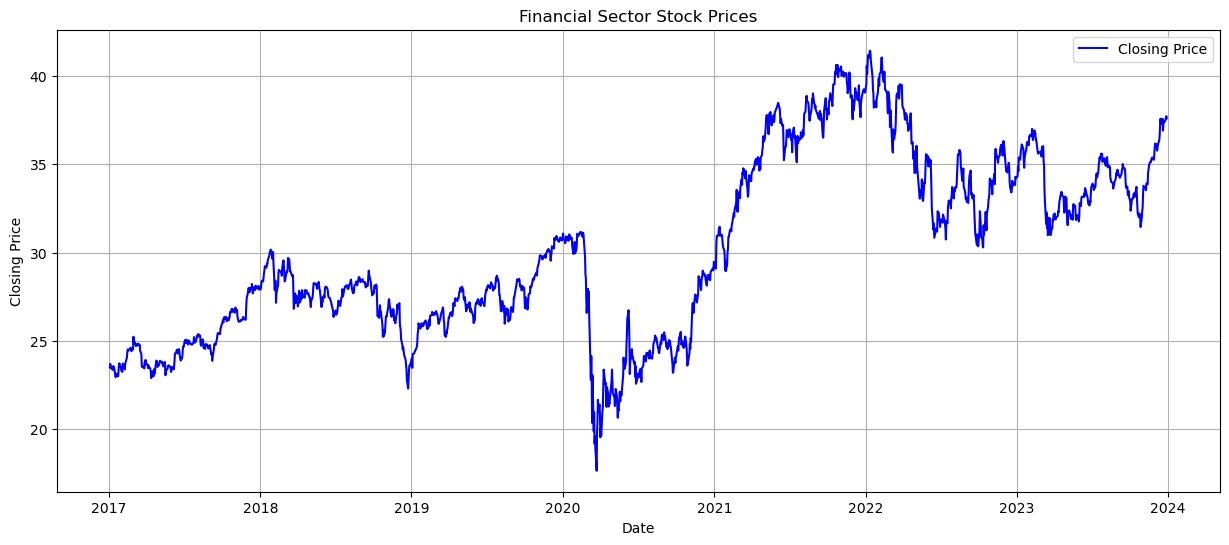

In [6]:
# Plotting the trend of the Financial Sector over the total timeframe
clean_df_financial.loc[:, 'timestamp'] = pd.to_datetime(clean_df_financial['timestamp'])

# Setting the index to the 'timestamp' column
clean_df_financial.set_index('timestamp', inplace=True)

# Plot the data
plt.figure(figsize=(15, 6))
plt.plot(clean_df_financial.index, clean_df_financial['close'], label='Closing Price', color='blue')

# Step 4: Customize the plot
plt.title('Financial Sector Stock Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.legend()
plt.show()

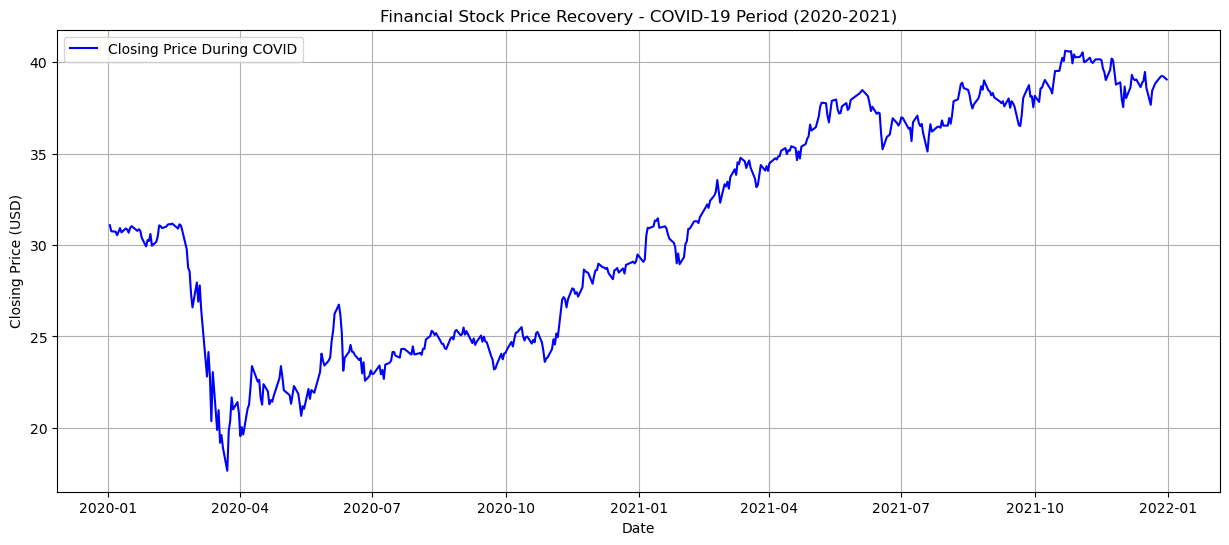

In [7]:
# Plotting the trend of the Financial Sector during the initial Covid timeframe
# Filtering the data for the desired time period
during_covid_data = clean_df_financial[(clean_df_financial.index >= during_covid_start) & (clean_df_financial.index <= during_covid_end)]

# Plotting the 'close' prices for the filtered period
plt.figure(figsize=(15, 6))
plt.plot(during_covid_data.index, during_covid_data['close'], label='Closing Price During COVID', color='blue')

# Step 4: Customize the plot
plt.title('Financial Stock Price Recovery - COVID-19 Period (2020-2021)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

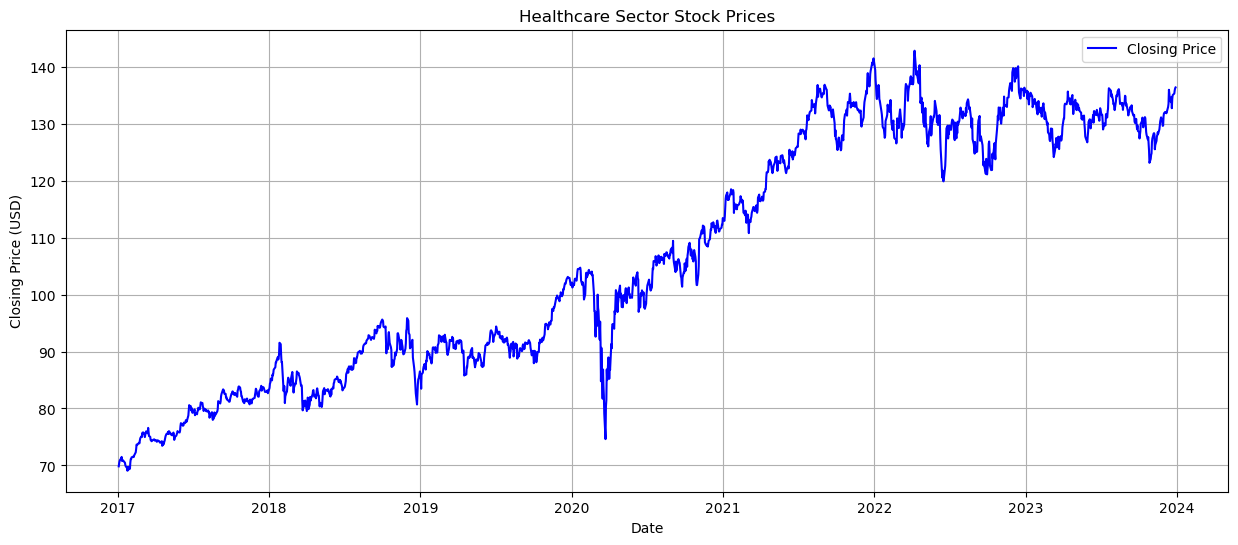

In [8]:
# Plotting the trend of the Healthcare Sector over the total timeframe
clean_df_healthcare.loc[:, 'timestamp'] = pd.to_datetime(clean_df_healthcare['timestamp'])

# Setting the index to the 'timestamp' column
clean_df_healthcare.set_index('timestamp', inplace=True)

# Plot the data
plt.figure(figsize=(15, 6))
plt.plot(clean_df_healthcare.index, clean_df_healthcare['close'], label='Closing Price', color='blue')

# Step 4: Customize the plot
plt.title('Healthcare Sector Stock Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

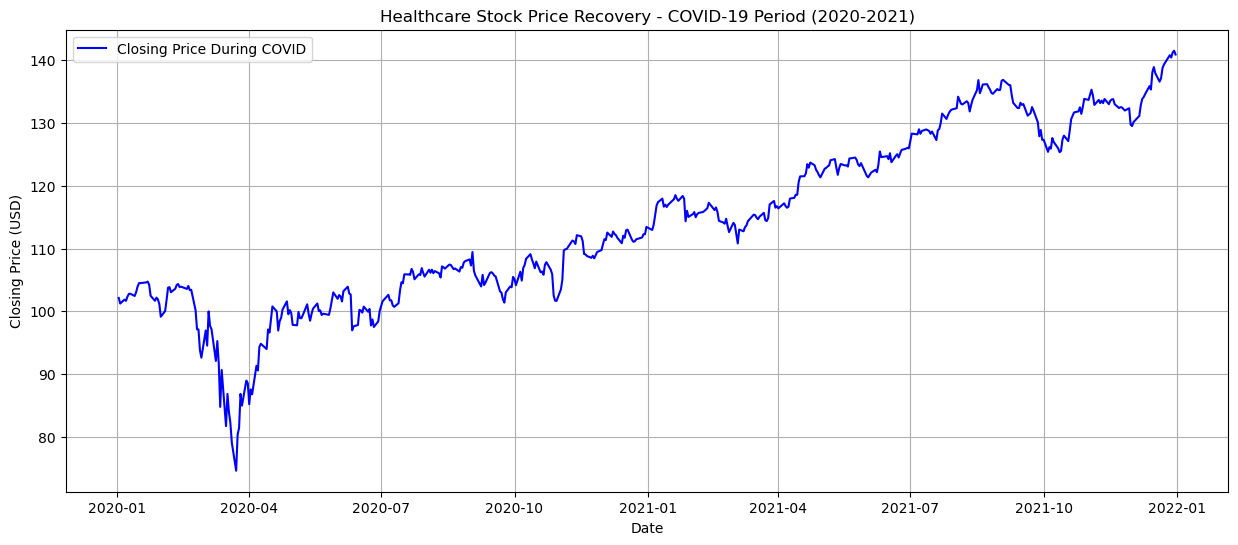

In [9]:
# Plotting the trend of the Healthcare Sector during the initial Covid timeframe
# Filtering the data for the desired time period
during_covid_data = clean_df_healthcare[(clean_df_healthcare.index >= during_covid_start) & (clean_df_healthcare.index <= during_covid_end)]

# Plotting the 'close' prices for the filtered period
plt.figure(figsize=(15, 6))
plt.plot(during_covid_data.index, during_covid_data['close'], label='Closing Price During COVID', color='blue')

# Step 4: Customize the plot
plt.title('Healthcare Stock Price Recovery - COVID-19 Period (2020-2021)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

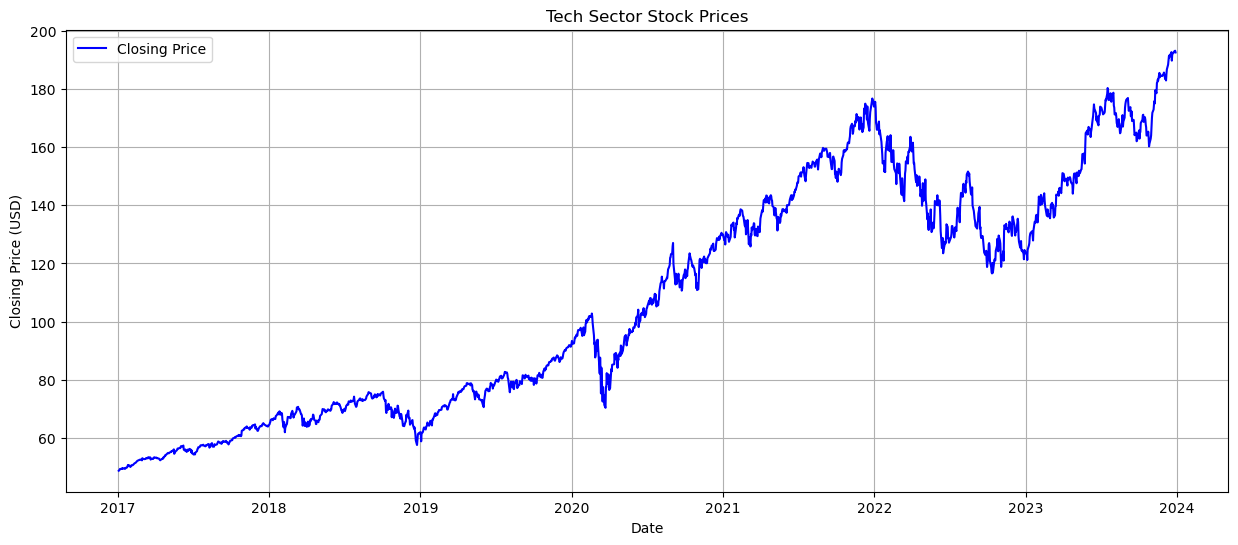

In [10]:
# Plotting the trend of the Tech Sector over the total timeframe
clean_df_technology.loc[:, 'timestamp'] = pd.to_datetime(clean_df_technology['timestamp'])

# Setting the index to the 'timestamp' column
clean_df_technology.set_index('timestamp', inplace=True)

# Step 3: Plot the data
plt.figure(figsize=(15, 6))
plt.plot(clean_df_technology.index, clean_df_technology['close'], label='Closing Price', color='blue')

# Step 4: Customize the plot
plt.title('Tech Sector Stock Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

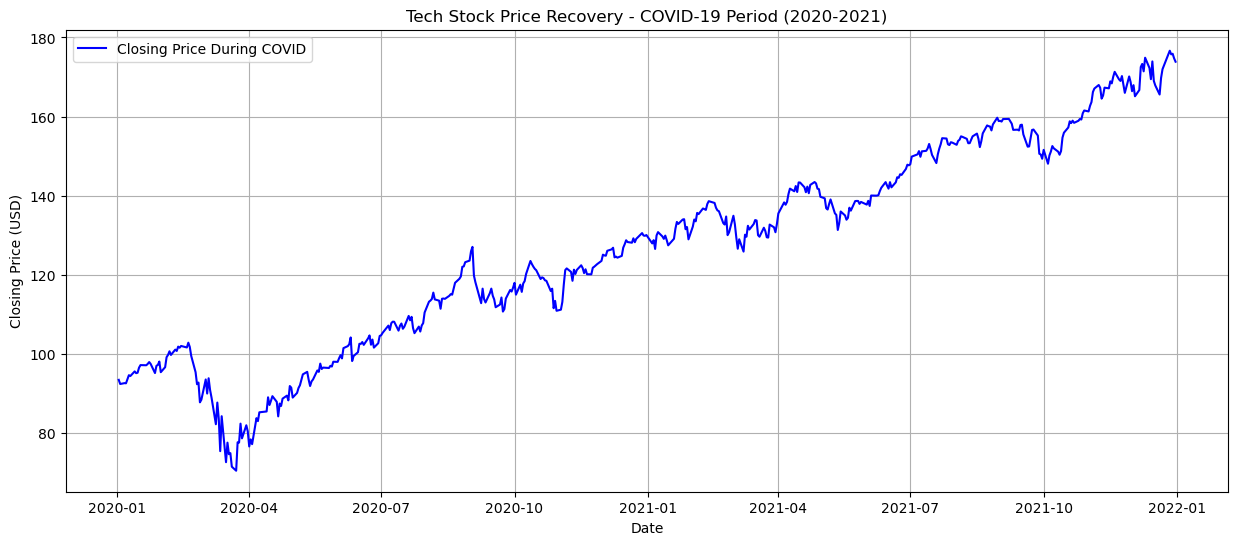

In [11]:
# Plotting the trend of the Tech Sector during the initial Covid timeframe
# Filtering the data for the desired time period
during_covid_data = clean_df_technology[(clean_df_technology.index >= during_covid_start) & (clean_df_technology.index <= during_covid_end)]

# Plotting the 'close' prices for the filtered period
plt.figure(figsize=(15, 6))
plt.plot(during_covid_data.index, during_covid_data['close'], label='Closing Price During COVID', color='blue')

# Step 4: Customize the plot
plt.title('Tech Stock Price Recovery - COVID-19 Period (2020-2021)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

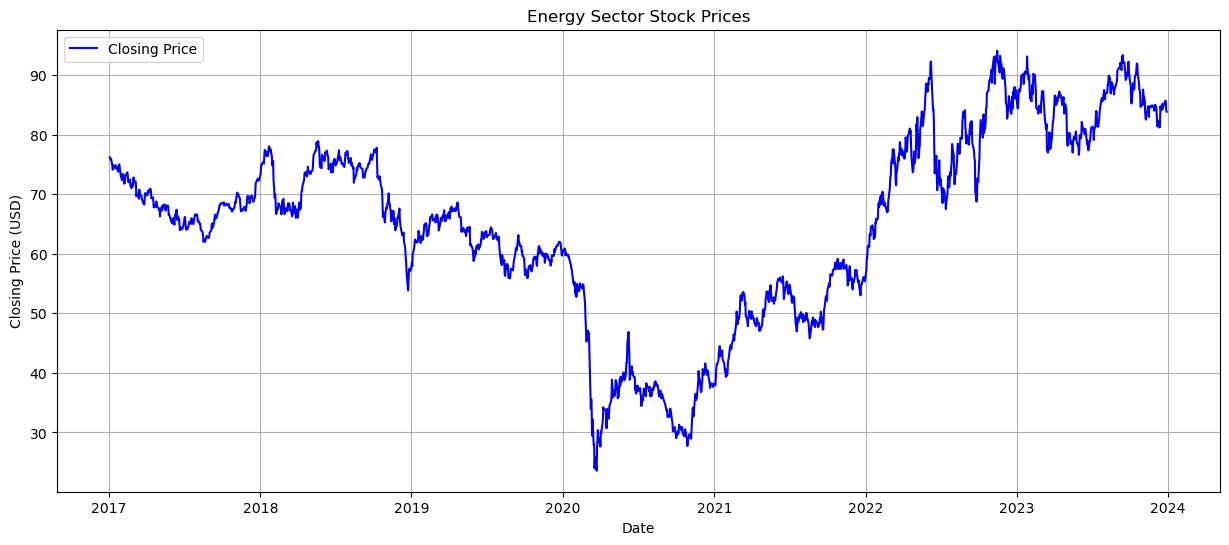

In [12]:
# Plotting the trend of the Energy Sector over the total timeframe
clean_df_energy.loc[:, 'timestamp'] = pd.to_datetime(clean_df_energy['timestamp'])

# Setting the index to the 'timestamp' column
clean_df_energy.set_index('timestamp', inplace=True)

# Step 3: Plot the data
plt.figure(figsize=(15, 6))
plt.plot(clean_df_energy.index, clean_df_energy['close'], label='Closing Price', color='blue')

# Step 4: Customize the plot
plt.title('Energy Sector Stock Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

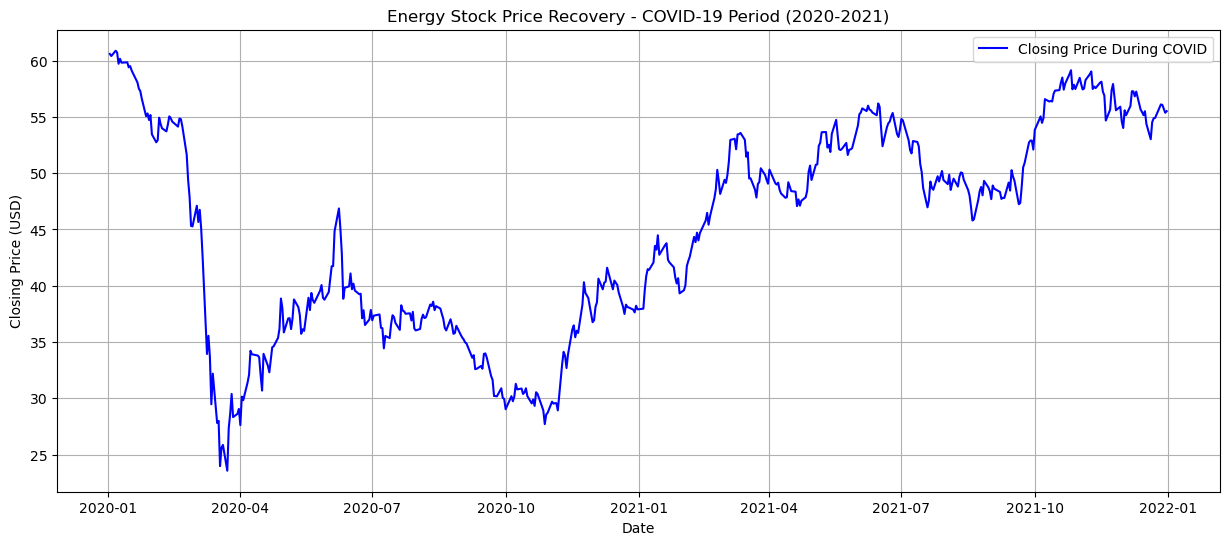

In [13]:
# Plotting the trend of the Energy Sector during the initial Covid timeframe
# Filtering the data for the desired time period
during_covid_data = clean_df_energy[(clean_df_energy.index >= during_covid_start) & (clean_df_energy.index <= during_covid_end)]

# Plotting the 'close' prices for the filtered period
plt.figure(figsize=(15, 6))
plt.plot(during_covid_data.index, during_covid_data['close'], label='Closing Price During COVID', color='blue')

# Step 4: Customize the plot
plt.title('Energy Stock Price Recovery - COVID-19 Period (2020-2021)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

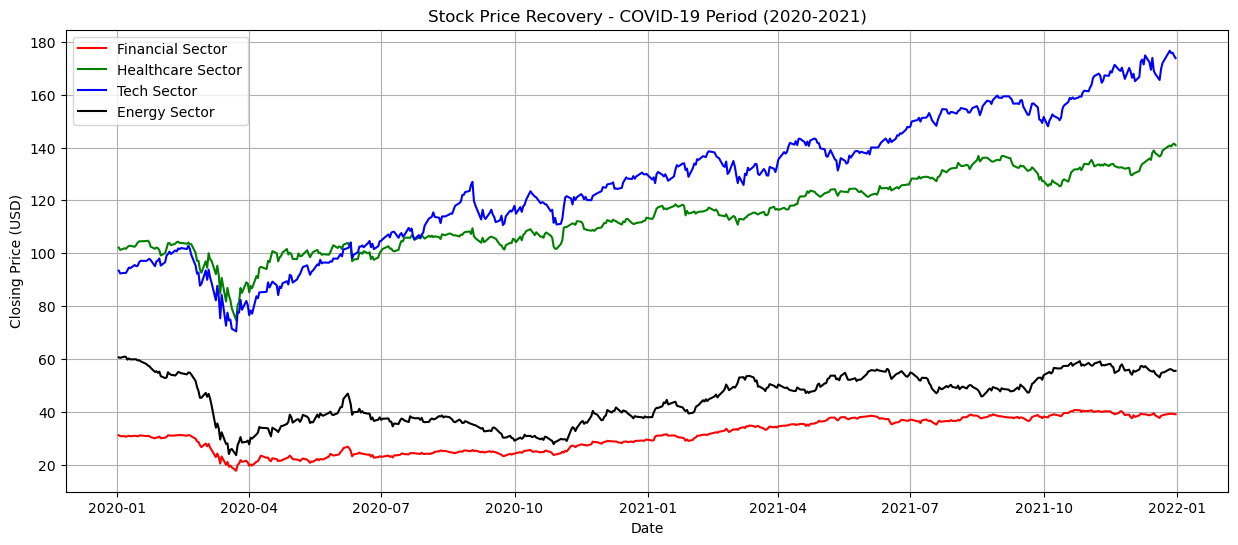

In [14]:
# Combined Stock Price Recovery graph for all the sectors

# The DataFrame is filtered for the during COVID time period
financial_data = clean_df_financial[(clean_df_financial.index >= during_covid_start) & (clean_df_financial.index <= during_covid_end)]
healthcare_data = clean_df_healthcare[(clean_df_healthcare.index >= during_covid_start) & (clean_df_healthcare.index <= during_covid_end)]
tech_data = clean_df_technology[(clean_df_technology.index >= during_covid_start) & (clean_df_technology.index <= during_covid_end)]
energy_data = clean_df_energy[(clean_df_energy.index >= during_covid_start) & (clean_df_energy.index <= during_covid_end)]

# Plot the data for the during COVID time period
plt.figure(figsize=(15, 6))

# Plotting the 'close' prices for the filtered period
plt.plot(financial_data.index, financial_data['close'], label='Financial Sector', color='red')
plt.plot(healthcare_data.index, healthcare_data['close'], label='Healthcare Sector', color='green')
plt.plot(tech_data.index, tech_data['close'], label='Tech Sector', color='blue')
plt.plot(energy_data.index, energy_data['close'], label='Energy Sector', color='black')

# Step 4: Customize the plot
plt.title('Stock Price Recovery - COVID-19 Period (2020-2021)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

In [15]:
# The daily % returns for each sector are calculated below, from the closing prices

# Financial Sector
financial_data = financial_data.sort_values(by='timestamp', ascending=True)
financial_data['returns'] = financial_data['close'].pct_change() * 100
financial_data['returns'] = financial_data['returns'].round(2)
financial_data['returns'] = financial_data['returns'].fillna(0)
financial_data.rename(columns={'returns': 'returns (%)'}, inplace=True)
#financial_data['returns'] = financial_data['returns'].astype(str) + '%'


# Healthcare Sector
healthcare_data = healthcare_data.sort_values(by='timestamp', ascending=True)
healthcare_data['returns'] = healthcare_data['close'].pct_change() * 100
healthcare_data['returns'] = healthcare_data['returns'].round(2)
healthcare_data['returns'] = healthcare_data['returns'].fillna(0)
healthcare_data.rename(columns={'returns': 'returns (%)'}, inplace=True)
#healthcare_data['returns'] = healthcare_data['returns'].astype(str) + '%'

# Technology Sector
tech_data = tech_data.sort_values(by='timestamp', ascending=True)
tech_data['returns'] = tech_data['close'].pct_change() * 100
tech_data['returns'] = tech_data['returns'].round(2)
tech_data['returns'] = tech_data['returns'].fillna(0)
tech_data.rename(columns={'returns': 'returns (%)'}, inplace=True)
#tech_data['returns'] = tech_data['returns'].astype(str) + '%'

# Energy Sector
energy_data = energy_data.sort_values(by='timestamp', ascending=True)
energy_data['returns'] = energy_data['close'].pct_change() * 100
energy_data['returns'] = energy_data['returns'].round(2)
energy_data['returns'] = energy_data['returns'].fillna(0)
energy_data.rename(columns={'returns': 'returns (%)'}, inplace=True)
#energy_data['returns'] = energy_data['returns'].astype(str) + '%'

# Display the results to sense-check
tech_data

,open,high,low,close,volume,returns (%)
timestamp,,,,,,
2020-01-02,92.50,93.39,92.32,93.39,13283116,0.00
2020-01-03,92.03,92.98,92.02,92.34,15011834,-1.12
2020-01-06,91.42,92.66,91.25,92.56,7814969,0.24
2020-01-07,92.72,92.98,92.38,92.52,7681782,-0.04
2020-01-08,92.62,93.92,92.45,93.51,11627205,1.07
...,...,...,...,...,...,...
2021-12-27,173.63,176.69,173.59,176.65,6639571,2.15
2021-12-28,176.98,177.04,175.29,175.73,5711982,-0.52
2021-12-29,175.79,176.59,174.97,175.88,4843886,0.09


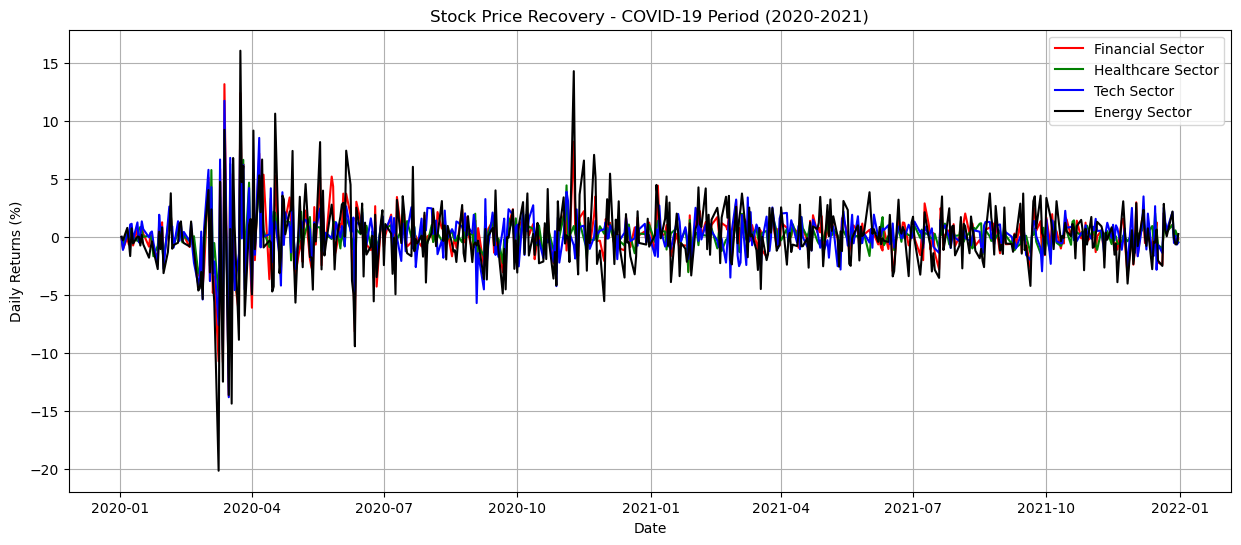

In [16]:
# The Daily % returns are plotted for the same during COVID time period
plt.figure(figsize=(15, 6))

# Plotting the 'close' prices for the filtered period
plt.plot(financial_data.index, financial_data['returns (%)'], label='Financial Sector', color='red')
plt.plot(healthcare_data.index, healthcare_data['returns (%)'], label='Healthcare Sector', color='green')
plt.plot(tech_data.index, tech_data['returns (%)'], label='Tech Sector', color='blue')
plt.plot(energy_data.index, energy_data['returns (%)'], label='Energy Sector', color='black')

# Step 4: Customize the plot
plt.title('Stock Price Recovery - COVID-19 Period (2020-2021)')
plt.xlabel('Date')
plt.ylabel('Daily Returns (%)')
plt.grid(True)
plt.legend()
plt.show()

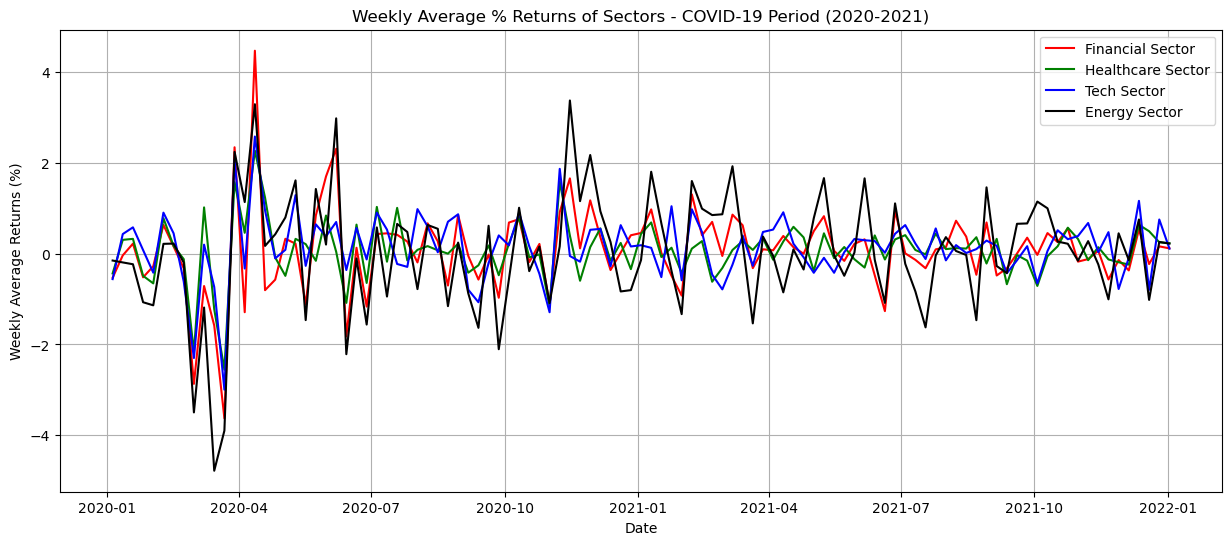

In [17]:
# Resample(W).mean function is used to calculate and plot the weekly avg % returns, for a cleaner weekly data analysis
financial_data_weekly = financial_data['returns (%)'].resample('W').mean()
healthcare_data_weekly = healthcare_data['returns (%)'].resample('W').mean()
tech_data_weekly = tech_data['returns (%)'].resample('W').mean()
energy_data_weekly = energy_data['returns (%)'].resample('W').mean()


plt.figure(figsize=(15, 6))

# Plotting the weekly average 'returns (%)' for each sector
plt.plot(financial_data_weekly.index, financial_data_weekly, label='Financial Sector', color='red')
plt.plot(healthcare_data_weekly.index, healthcare_data_weekly, label='Healthcare Sector', color='green')
plt.plot(tech_data_weekly.index, tech_data_weekly, label='Tech Sector', color='blue')
plt.plot(energy_data_weekly.index, energy_data_weekly, label='Energy Sector', color='black')

# Customize the plot
plt.title('Weekly Average % Returns of Sectors - COVID-19 Period (2020-2021)')
plt.xlabel('Date')
plt.ylabel('Weekly Average Returns (%)')
plt.grid(True)
plt.legend()
plt.show()

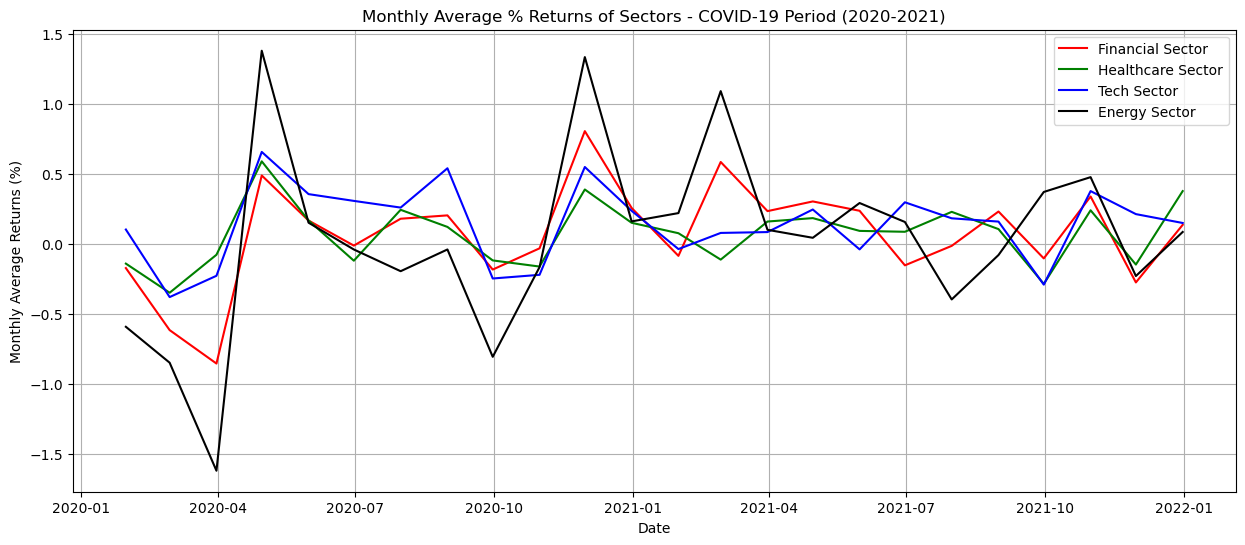

In [18]:
# Resample(ME).mean function is used to calculate the month-end avg % returns, for a cleaner monthly data analysis
financial_data_monthly = financial_data['returns (%)'].resample('ME').mean()
healthcare_data_monthly = healthcare_data['returns (%)'].resample('ME').mean()
tech_data_monthly = tech_data['returns (%)'].resample('ME').mean()
energy_data_monthly = energy_data['returns (%)'].resample('ME').mean()


plt.figure(figsize=(15, 6))

# Plotting the monthly average 'returns (%)' for each sector
plt.plot(financial_data_monthly.index, financial_data_monthly, label='Financial Sector', color='red')
plt.plot(healthcare_data_monthly.index, healthcare_data_monthly, label='Healthcare Sector', color='green')
plt.plot(tech_data_monthly.index, tech_data_monthly, label='Tech Sector', color='blue')
plt.plot(energy_data_monthly.index, energy_data_monthly, label='Energy Sector', color='black')

# Customize the plot
plt.title('Monthly Average % Returns of Sectors - COVID-19 Period (2020-2021)')
plt.xlabel('Date')
plt.ylabel('Monthly Average Returns (%)')
plt.grid(True)
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

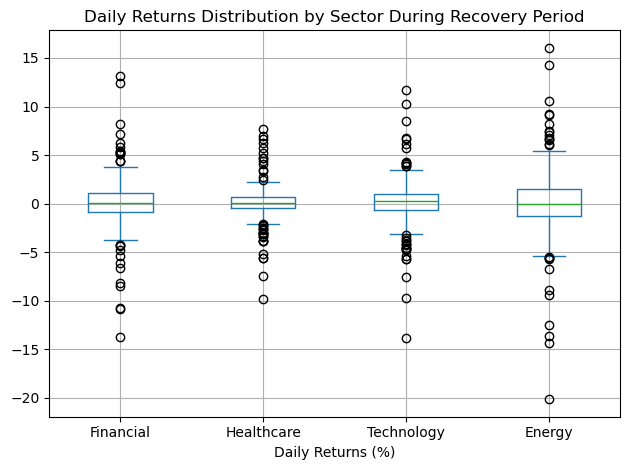

In [19]:
# Box-plot to show volatility as outliers

# Defining a combined dataframe for box-plot
daily_returns_df = pd.DataFrame({
    'Financial': financial_data['returns (%)'],
    'Healthcare': healthcare_data['returns (%)'],
    'Technology': tech_data['returns (%)'],
    'Energy': energy_data['returns (%)']
})


plt.figure(figsize=(10, 6))
daily_returns_df.plot(kind='box')
plt.title('Daily Returns Distribution by Sector During Recovery Period')
plt.xlabel('Daily Returns (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
daily_returns_df.describe()

,Financial,Healthcare,Technology,Energy
count,505.000000,505.000000,505.000000,505.000000
mean,0.069347,0.074396,0.142812,0.028673
std,2.192850,1.460099,1.982795,3.017639
min,-13.710000,-9.860000,-13.810000,-20.140000
25%,-0.870000,-0.450000,-0.670000,-1.310000
50%,0.100000,0.100000,0.250000,0.000000
75%,1.100000,0.650000,1.010000,1.470000
max,13.160000,7.710000,11.730000,16.040000


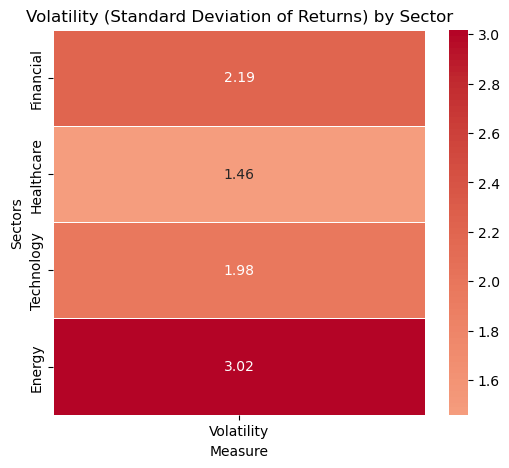

In [21]:
# Heatmap visualisation to calculate and show std. deviation, for volatility analysis
volatility_data = {
    'Financial': financial_data['returns (%)'].std(),
    'Healthcare': healthcare_data['returns (%)'].std(),
    'Technology': tech_data['returns (%)'].std(),
    'Energy': energy_data['returns (%)'].std()
}

# Convert to a DataFrame for the heatmap
volatility_df = pd.DataFrame(volatility_data, index=['Volatility']).T

# Create a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(volatility_df, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5)

# Customize the heatmap
plt.title('Volatility (Standard Deviation of Returns) by Sector')
plt.ylabel('Sectors')
plt.xlabel('Measure')

plt.show()

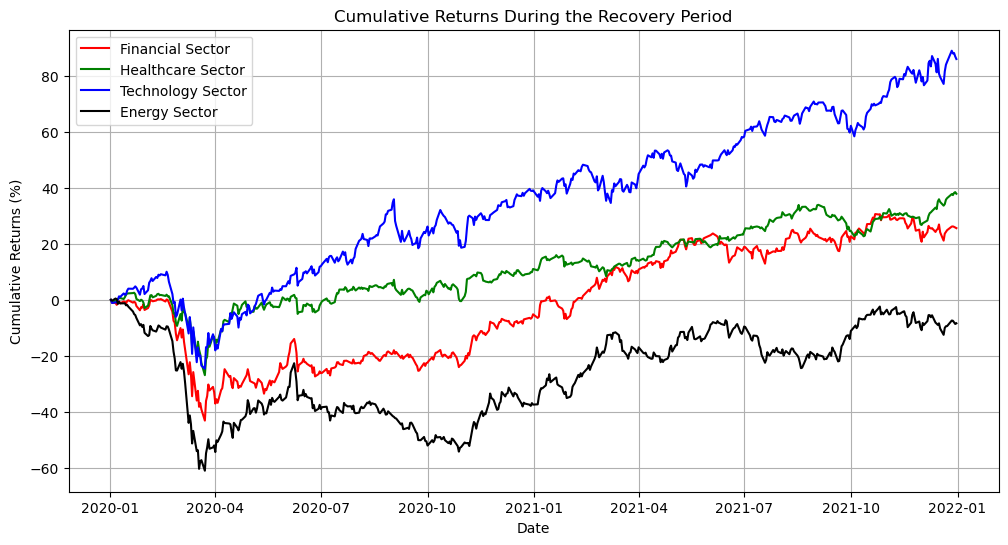

In [22]:
# Calculating cumulative returns for each sector using the cumprod function
financial_data['cumulative_returns'] = (1 + financial_data['returns (%)'] / 100).cumprod() - 1
healthcare_data['cumulative_returns'] = (1 + healthcare_data['returns (%)'] / 100).cumprod() - 1
tech_data['cumulative_returns'] = (1 + tech_data['returns (%)'] / 100).cumprod() - 1
energy_data['cumulative_returns'] = (1 + energy_data['returns (%)'] / 100).cumprod() - 1


plt.figure(figsize=(12, 6))
plt.plot(financial_data.index, financial_data['cumulative_returns'] * 100, label='Financial Sector', color='red')
plt.plot(healthcare_data.index, healthcare_data['cumulative_returns'] * 100, label='Healthcare Sector', color='green')
plt.plot(tech_data.index, tech_data['cumulative_returns'] * 100, label='Technology Sector', color='blue')
plt.plot(energy_data.index, energy_data['cumulative_returns'] * 100, label='Energy Sector', color='black')

# Add labels and title
plt.title('Cumulative Returns During the Recovery Period')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns (%)')
plt.grid(True)
plt.legend()
plt.show()

In [23]:
financial_data

,open,high,low,close,volume,returns (%),cumulative_returns
timestamp,,,,,,,
2020-01-02,30.89,31.0800,30.8000,31.08,28842678,0.00,0.000000
2020-01-03,30.68,30.8800,30.5900,30.75,51363556,-1.06,-0.010600
2020-01-06,30.47,30.7500,30.4600,30.73,27955341,-0.07,-0.011293
2020-01-07,30.66,30.7100,30.5300,30.53,39627472,-0.65,-0.017719
2020-01-08,30.56,30.9000,30.5600,30.73,47965161,0.66,-0.011236
...,...,...,...,...,...,...,...
2021-12-27,38.94,39.2200,38.7400,39.22,36120273,1.03,0.261991
2021-12-28,39.15,39.4899,39.1400,39.24,34055239,0.05,0.262622
2021-12-29,39.32,39.4300,39.1400,39.19,27150504,-0.13,0.260981


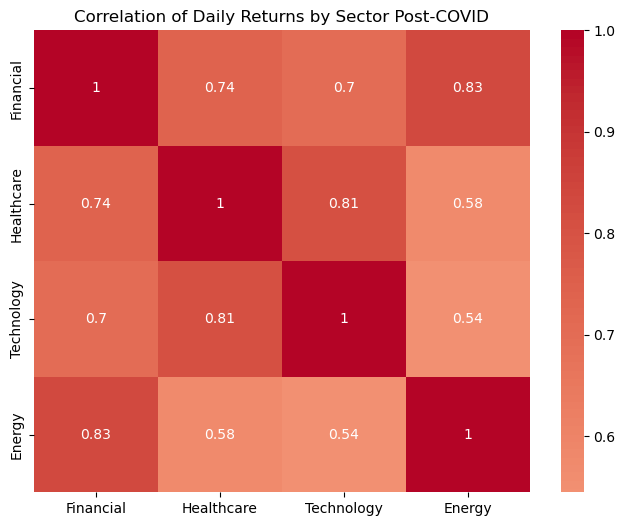

In [24]:
# Defining a dataframe of sector-wise % returns for correlation analysis
returns_dataframe = pd.DataFrame({
    'Financial': financial_data['returns (%)'],
    'Healthcare': healthcare_data['returns (%)'],
    'Technology': tech_data['returns (%)'],
    'Energy': energy_data['returns (%)']
})

# Running and plotting the correlation analysis using a heatmap
correlation_matrix = returns_dataframe.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Daily Returns by Sector Post-COVID')
plt.show()

In [25]:
# Defining the dataframe for regression analysis
regression_dataframe = pd.DataFrame({
    'Volatility': [financial_data['returns (%)'].std(), healthcare_data['returns (%)'].std(), 
                   tech_data['returns (%)'].std(), energy_data['returns (%)'].std()],
    'Initial Drop': [-13.71, -9.86, -13.81, -20.14],  # values representing the initial COVID drop - MIN values of the % returns of respective sectors have been used here
    'Recovery Time': [270, 90, 90, 600]    # number of days taken for sectors to recover to pre-crash levels
}, index=['Financial', 'Healthcare', 'Technology', 'Energy'])

# Define independent variables (predictors) and dependent variable (response)
X = regression_dataframe[['Volatility', 'Initial Drop']]
Y = regression_dataframe['Recovery Time']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model using statsmodels
model = sm.OLS(Y, X).fit()

# Print the summary of the regression, which includes coefficients, p-values, and R-squared
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          Recovery Time   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     4.747
Date:                Wed, 23 Oct 2024   Prob (F-statistic):              0.309
Time:                        17:16:01   Log-Likelihood:                -22.329
No. Observations:                   4   AIC:                             50.66
Df Residuals:                       1   BIC:                             48.82
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -482.1714    258.826     -1.863   

c:\Users\ammar\anaconda3\envs\dev\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
